In [2]:
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import torch.nn as nn
import torch.optim as optim
from torch import Tensor
import torch

class Object(object): pass

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


# Intro to Pytorch

In [12]:
t = torch.Tensor(np.array([1, 2, 3, 3, 3, 5]))
t = torch.Tensor(np.random.randn(2, 3))
t

tensor([[-1.5239, -1.3059, -0.4481],
        [-0.5844, -0.6378, -2.6085]])

In [13]:
torch.max(t, dim=1)

torch.return_types.max(
values=tensor([-0.4481, -0.5844]),
indices=tensor([2, 0]))

In [ ]:
t[1:7]

Softmax normalizes a vector of K numbers into a probability distribution proportional to the exponents - a categorical distribution, i.e. a distribution over K possible outcomes.

In [22]:
torch.softmax(Tensor([-1, 2.5, 0.5]), dim=0)

tensor([0.0259, 0.8580, 0.1161])

# MNIST with Pytorch

In [3]:
t_mnist = Object()
t_mnist.RAND_STATE = 12
t_mnist.raw = datasets.fetch_mldata("MNIST original")
t_mnist.X = t_mnist.raw.data.reshape(-1, 28, 28).astype(np.float32)
t_mnist.y = t_mnist.raw.target.astype(np.long)

/Users/kalininalex/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Users/kalininalex/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
def print_image(x, y, n=None):
    if n is None:
        n = np.random.randint(x.shape[0])
    print(y[n])
    _ = plt.imshow(x[n], cmap="gray")

4


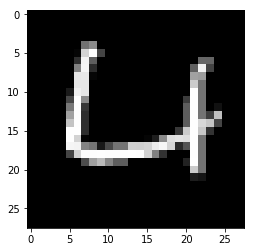

In [5]:
print_image(t_mnist.X, t_mnist.y)

<img src="mnist.png" alt="" style="width: 60%"/>

In [6]:
t_mnist.X_train, t_mnist.X_test, t_mnist.y_train, t_mnist.y_test = \
    train_test_split(t_mnist.X, t_mnist.y, test_size=0.2, stratify=t_mnist.y, 
                     random_state=t_mnist.RAND_STATE)

In [7]:
t_mnist.X_train.shape, t_mnist.X_test.shape, t_mnist.y_train.shape, t_mnist.y_test.shape

((56000, 28, 28), (14000, 28, 28), (56000,), (14000,))

## Softmax

In [8]:
torch.softmax(Tensor([-1, 2.5, 0.5]), 0)

tensor([0.0259, 0.8580, 0.1161])

In [9]:
t_mnist.loss = nn.NLLLoss

## Convert data

In [10]:
? nn.Conv2d

In [11]:
t_mnist.X_train.shape

(56000, 28, 28)

In [12]:
t_mnist.X_train_ch = np.expand_dims(t_mnist.X_train, axis=1)

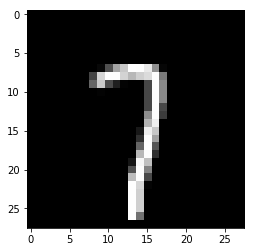

In [13]:
plt.imshow(t_mnist.X_train[44354], cmap="gray")

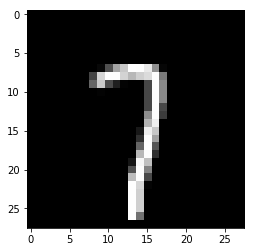

In [14]:
plt.imshow(t_mnist.X_train_ch[44354][0], cmap="gray")

In [15]:
t_mnist.X_train_t = torch.from_numpy(np.expand_dims(t_mnist.X_train, axis=1))
t_mnist.X_test_t = torch.from_numpy(np.expand_dims(t_mnist.X_test, axis=1))
t_mnist.y_train_t = torch.from_numpy(t_mnist.y_train)
t_mnist.y_test_t = torch.from_numpy(t_mnist.y_test)

In [16]:
t_mnist.y_train_t

tensor([2, 8, 7,  ..., 3, 2, 1])

In [17]:
t_mnist.X_train_t.shape

torch.Size([56000, 1, 28, 28])

## Training!

## Explain gradient and training

1. Loss function is a function.
1. Forward pass.
1. Calculate output -> error.
1. Gradient of a loss function gives how we should update weights.

In [18]:
def accuracy(y_pred_one_hot, y_true):
    y_pred = y_pred_one_hot.max(dim=1)[1]
    return (y_pred == y_true).sum().item() / y_true.shape[0]

## Batches

# LetNet

In [19]:
def create_lenet_classic_2():
    return nn.Sequential(
        #28x28x1
        nn.Conv2d(1, 12, kernel_size=9, stride=1, padding=4),
        nn.ReLU(),
        #28x28x12
        nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0),
        #14x14x12
        nn.Conv2d(12, 24, kernel_size=(7,7), stride=1, padding=2),
        nn.ReLU(),
        #12x12x24
        nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0),
        #6x6x24
        nn.Flatten(),
        nn.Linear(6*6*24, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
        nn.LogSoftmax(dim=-1)
    )

In [123]:
def create_lenet_classic():
    return nn.Sequential(
        #28x28x1
        nn.Conv2d(1, 6, kernel_size=9, stride=1, padding=4),
        nn.ReLU(),
        #28x28x6
        nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0),
        #14x14x6
        nn.Conv2d(6, 16, kernel_size=(7,7), stride=1, padding=3),
        nn.ReLU(),
        #14x14x16
        nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0),
        #7x7x16
        nn.Flatten(),
        nn.Linear(7*7*16, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
        nn.LogSoftmax(dim=-1)
    )

In [124]:
# ? nn.Conv2d

In [125]:
t_mnist.learning_rate = 1e-4
t_mnist.loss = nn.NLLLoss()
t_mnist.optim = torch.optim.SGD(t_mnist.nn.parameters(), lr=t_mnist.learning_rate)

In [126]:
def train_batch(net, data, epochs=3):
    optim = torch.optim.SGD(net.parameters(), 1e-4, momentum=0.9)

    batch_size = 16
    batches = int(data.X_train_t.shape[0] / batch_size)
    
    for i in range(epochs):
        for b in range(batches):
            start = b * batch_size
            end = start + batch_size
#             print(start, end)
            x_batch = data.X_train_t[start : end]
            y_batch = data.y_train_t[start : end]
        
             # Forward pass: compute predicted y by passing x to the model.
#             print(x_batch.shape)
            y_pred = net(x_batch)

            # Compute and print loss.
            loss = data.loss(y_pred, y_batch)

            # Reset gradient
            net.zero_grad()

            # Backward pass: compute gradient of the loss with respect to model
            # parameters
            loss.backward()

            # Calling the step function on an Optimizer makes an update to its
            # parameters
            optim.step()

        if True: # i % 1 == 1:
            print(i, "Loss:", loss.item())
            print(i, "Test accuracy: ", accuracy(net(data.X_test_t), data.y_test_t))

In [127]:
%%time
t_mnist.nn = create_lenet_classic()
train_batch(t_mnist.nn, t_mnist, epochs=1)

0 Loss: 0.04985995963215828
0 Test accuracy:  0.9708571428571429
CPU times: user 1min 59s, sys: 4.05 s, total: 2min 3s
Wall time: 45.2 s


Test the accuracy on a shifted image:

In [128]:
accuracy(t_mnist.nn(t_mnist.X_test_t), t_mnist.y_test_t)

0.9708571428571429

# Predict a Single Image

In [129]:
t_mnist.test_n = 2625
t_mnist.X_test[t_mnist.test_n].shape

(28, 28)

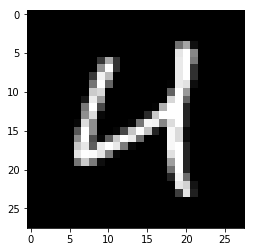

In [131]:
plt.imshow(t_mnist.X_test[t_mnist.test_n], cmap="gray")

In [132]:
t_mnist.test_image = np.expand_dims(np.expand_dims(t_mnist.X_test[t_mnist.test_n], axis=0), axis=0)
t_mnist.test_image.shape

(1, 1, 28, 28)

In [133]:
t_mnist.test_image_t = torch.from_numpy(t_mnist.test_image)

In [134]:
logits = t_mnist.nn(t_mnist.test_image_t)
logits

tensor([[-8.7922e+00, -8.1618e+00, -7.0739e+00, -1.0664e+01, -4.7954e-03,
         -1.4796e+01, -1.0095e+01, -7.3700e+00, -7.7367e+00, -6.0456e+00]],
       grad_fn=<LogSoftmaxBackward>)

In [135]:
torch.exp(logits)

tensor([[1.5191e-04, 2.8534e-04, 8.4694e-04, 2.3376e-05, 9.9522e-01, 3.7520e-07,
         4.1304e-05, 6.2989e-04, 4.3650e-04, 2.3683e-03]],
       grad_fn=<ExpBackward>)

In [136]:
torch.argmax(torch.exp(logits[0]))

tensor(4)

In [137]:
def predict_image(net, x, y, n=None):
    if n is None:
        n = np.random.randint(x.shape[0])
    image = np.expand_dims(np.expand_dims(x[n], axis=0), axis=0).astype(np.float32)
    image_t = torch.from_numpy(image)
    pred_t = net(image_t)
    pred = torch.argmax(torch.exp(pred_t[0])).item()
    print(n, ':', y[n], ' : ',  pred)
    plt.imshow(x[n], cmap="gray")

11194 : 7  :  7


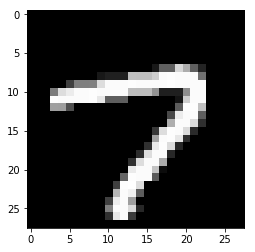

In [180]:
predict_image(t_mnist.nn, t_mnist.X_test, t_mnist.y_test)

In [181]:
def find_wrong_image(net, x, y):
    while True:
        n = np.random.randint(x.shape[0])
        image = np.expand_dims(np.expand_dims(x[n], axis=0), axis=0).astype(np.float32)
        image_t = torch.from_numpy(image)
        pred_t = net(image_t)
        pred = torch.argmax(torch.exp(pred_t[0])).item()
        if pred != y[n]:
            print(n, ':', y[n], ' : ',  pred)
            plt.imshow(x[n], cmap="gray")
            break

11488 : 2  :  6


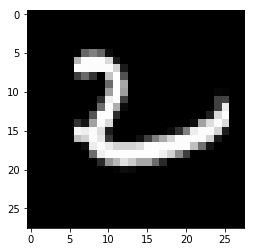

In [187]:
find_wrong_image(t_mnist.nn, t_mnist.X_test, t_mnist.y_test)

# Predict own image

In [188]:
from PIL import Image

In [189]:
digit = np.array(Image.open('images/digit.png')).astype(np.float32)

In [190]:
digit = digit[:,:,0]

In [191]:
digit.shape

(28, 28)

0 : 3  :  3


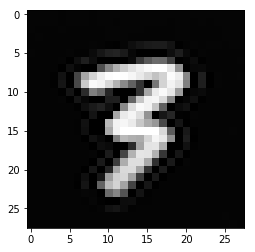

In [192]:
predict_image(t_mnist.nn, [digit], [3], n=0)

# Redis AI

1. docker run -p 6379:6379 -it --rm redisai/redisai /bin/bash
1. /usr/local/bin//redis-server --loadmodule /usr/lib/redis/modules/redisai.so &
1. redis-cli
1. AI.CONFIG LOADBACKEND TORCH redisai_torch/redisai_torch.so 


* https://oss.redislabs.com/redisai/commands/
* https://oss.redislabs.com/redisai/

Use Redisai.py to upload the model to Redis.

In [193]:
import ml2rt

In [194]:
t_mnist.nn.eval()
t_mnist.nn_script = torch.jit.trace(t_mnist.nn, t_mnist.X_test_t)

We can use TorchScript model just like any other PyTorch model:

0 : 3  :  3


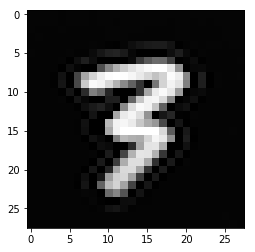

In [195]:
predict_image(t_mnist.nn_script, [digit], [3], n=0)

Save the TorchScript model:

In [196]:
t_mnist.nn_script.eval()  # Important?
t_mnist.nn_script.save('lenet.pt')
t_mnist.loaded_nn_script = torch.jit.load('lenet.pt')

In [197]:
ml2rt.save_torch(t_mnist.nn_script, 'model.pt')
t_mnist.loaded_nn = ml2rt.load_model('model.pt')

/Users/kalininalex/miniconda3/envs/py36/lib/python3.6/site-packages/ml2rt/exporter.py:44: UserWarning: Graph is in training mode. Converting to evaluation mode
  'Graph is in training mode. Converting to evaluation mode')


In [198]:
import redisai

In [199]:
t_mnist.redis = redisai.Client()

In [ ]:
t_mnist.redis.loadbackend('TORCH', 'redisai_torch/redisai_torch.so')

In [201]:
t_mnist.redis.modelset('lenet', redisai.Backend.torch, redisai.Device.cpu, t_mnist.loaded_nn)

b'OK'

Send an image for recognition:

In [202]:
t_mnist.redis.tensorset('image', 
                        np.expand_dims(
                            np.expand_dims(digit, axis=0), 
                            axis=0))

b'OK'

In [203]:
t_mnist.redis.modelrun('lenet', ['image'], ['pred'])

b'OK'

In [204]:
np.argmax(np.exp(t_mnist.redis.tensorget('pred')))

3

Write a function that submits a digit for prediction:

In [205]:
def predict_redis(client, x, y, n=None):
    assert isinstance(client, redisai.Client)
    if n is None:
        n = np.random.randint(x.shape[0])
    image = x[n]
    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=0)
    client.tensorset('image', image)
    client.modelrun('lenet', ['image'], ['pred'])
    pred = client.tensorget('pred')
    pred = np.argmax(pred)
    print("Pred: ", pred, "actual:", y[n])
    plt.imshow(x[n], cmap="gray")

Pred:  9 actual: 9


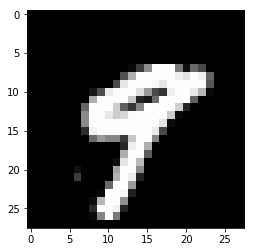

In [209]:
predict_redis(t_mnist.redis, t_mnist.X_test, t_mnist.y_test)